# Practice Case Clustering Analysis

## Read and Qick-look Data

**Import Libraries**

In [710]:
# Import libraries
import pandas as pd  #read dataframe
import numpy as np  

# Visualization
import seaborn as sns  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Clustering Analysis
from sklearn.cluster import KMeans #K-means clustering
from sklearn.cluster import AgglomerativeClustering  #Hierarchial clustering
import scipy.cluster.hierarchy as sch    # Hierarchial clustering
from sklearn.cluster import DBSCAN       # DBscan clustering
from sklearn import datasets

**Read Data**

In [711]:
#Read data

data = pd.read_csv('german_credit_data.csv', encoding='Latin1')
##data.head()

**Data Preparation**

In [712]:
# Convert type int in job to labels such as below

data['Job'][data['Job']==0]='unskilled and non-resident'
data['Job'][data['Job']==1]='unskilled and resident'
data['Job'][data['Job']==2]='skilled'
data['Job'][data['Job']==3]='highly skilled'

C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [713]:
# Checking number of missing values each variables

count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
Unnamed: 0            0
dtype: int64

In [714]:
#Handle missing values in categorical data 'Checking account' and 'Saving accounts' using mode

data['Checking account'] = data['Checking account'].fillna(data['Checking account'].mode().values[0])
data['Saving accounts'] = data['Saving accounts'].fillna(data['Saving accounts'].mode().values[0])
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,skilled,own,little,little,1169,6,radio/TV
1,1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,2,49,male,unskilled and resident,own,little,little,2096,12,education
3,3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,4,53,male,skilled,free,little,little,4870,24,car


In [715]:
# Checking number of missing values each variables

count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
Unnamed: 0          0
dtype: int64

In [716]:
# Checking information type of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null object
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [717]:
# Get information unique code in data

print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Job : ['skilled' 'unskilled and resident' 'highly skilled'
 'unskilled and non-resident']
Housing : ['own' 'free' 'rent']
Saving accounts : ['little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


**Label Encoder**

In [718]:
from sklearn import preprocessing
data = data.apply(preprocessing.LabelEncoder().fit_transform)
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,48,1,1,1,0,0,142,2,5
1,1,3,0,1,1,0,1,770,29,5
2,2,30,1,3,1,0,0,390,8,3
3,3,26,1,1,0,0,0,848,26,4
4,4,34,1,1,0,0,0,734,17,1


**Create Correlation between variable**

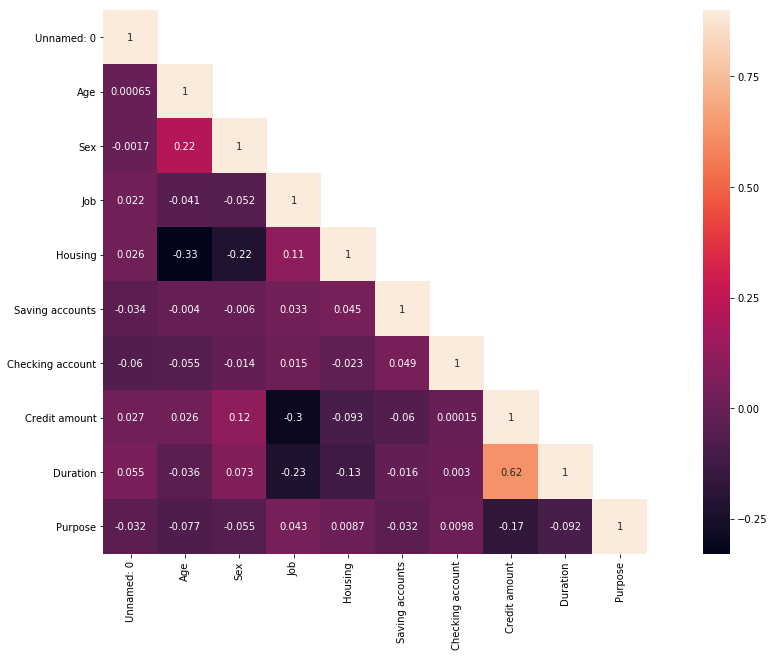

In [719]:
#create correlation with hitmap

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#create correlation
corr = data.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

From the heat map above, I want to know the variables that are interconnected or have a strong relationship that can later be used for further clustering analysis. Of the result, which does not have a fairly close relationship is variable 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account'. So, I'll drop that variable in the next step.
From that result, had been concluded that i dont using categorical variable in this next step of clustering analysis.

In [720]:
# Dropping unusefull variable in data

data=data.drop(['Unnamed: 0', 'Saving accounts', 'Checking account', 'Purpose', 'Job', 'Housing', 'Sex'], axis=1)

In [721]:
data.head()

,Age,Credit amount,Duration
0,48,142,2
1,3,770,29
2,30,390,8
3,26,848,26
4,34,734,17


Before starting clustering analysis, we must ensure that the data is in an array type.

In [722]:
# Get array of data before clustering analysis

X = np.asarray(data)

To get segmentation of creditor in this dataset, I am using three clustering method that is K-means clustering, Hierarchial Clustering and DBScan Clustering.

## Modelling Clustering

### 1. Clustering analysis using K-Means

In the K-means method, first we need to specify the values of the K (cluster) that we want. This determination of K (cluster) can be determined using the Elbow method/Scree plot. From the scree plot, we can choose the optimal k for K-means clustering analysis.

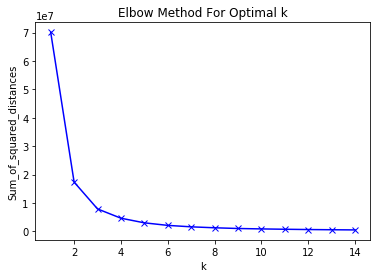

In [723]:
#Get optimal k on k-means clustering analysis using scree plot

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

After looking at the scree plot, I use k = 3 for the next K-means clustering analysis because I think k = 3 is the optimal k, where if taken k = 4, 5, dst clustering result will be constant.

In [724]:
# K-Means clustering analysis using k=3
# Fitting model K-Means clustering analysis
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [822]:
# Displaying clustering results data
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered.head()

,0,1,2,cluster
0,48,142,2,0
1,3,770,29,1
2,30,390,8,2
3,26,848,26,1
4,34,734,17,1


In [726]:
# Get infromation of number mobile by cluster
data_clustered['cluster'].value_counts()

0    357
2    322
1    321
Name: cluster, dtype: int64

From clustering results using K-means with k = 3 formed the cluster result as above. For cluster 0 amounted to 357 creditor, for cluster 1 amounted to 322 creditor and cluster 2 amounted to 321 creditor.

Text(0.5,0,'Type of Cluster')

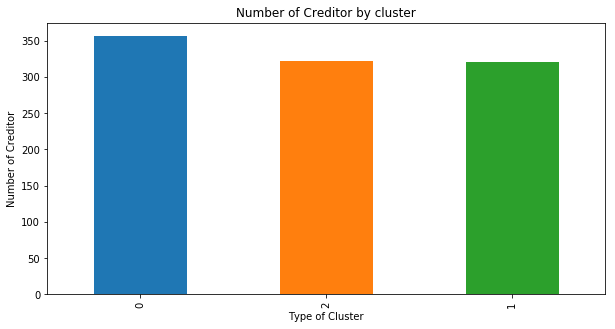

In [727]:
#Distribution of Class cluster

data_clustered['cluster'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Creditor by cluster")
plt.ylabel('Number of Creditor')
plt.xlabel('Type of Cluster')

From the results of the above barplot, it looks that the cluster that has the most amount of creditor is **cluster 1** and the fewest creditor are **clusters 0**.

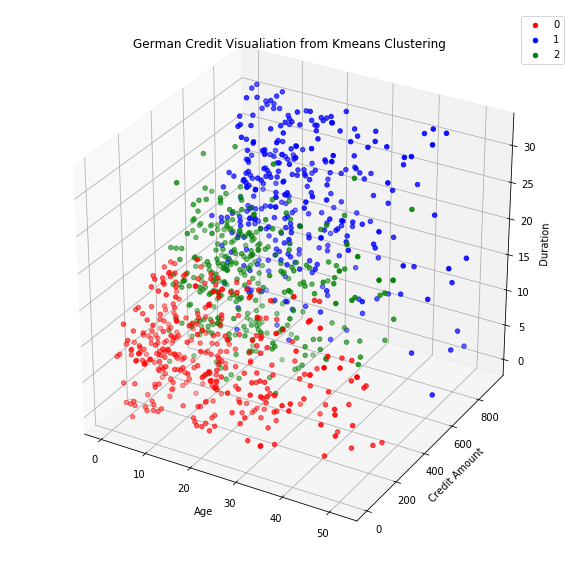

In [728]:
# Visualization the Result
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= kmeans.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit Amount")
ax.set_zlabel("Duration")
plt.title("German Credit Visualiation from Kmeans Clustering")
plt.show()

From the results of 3D visualization above it looks that:

- Cluster 1 (Red) is a group that has the characteristics of the distribution age from young to old, but it has a low credit amount and a short duration of payment.
- Cluster 2 (blue) is  a group that has the characteristics of the age of distribution from young to old, large credit amounts and a relatively long payment duration of payment.
- Cluster 0 (green) is a group that has the characteristics of the age of distribution from young to old, the amount of the current credit and the duration of the payment is relatively not long.

**To see a clearer visualization, here I created a scatter plot between 2 variables. Thus, the characteristics of each cluster can be more clearly identified.**

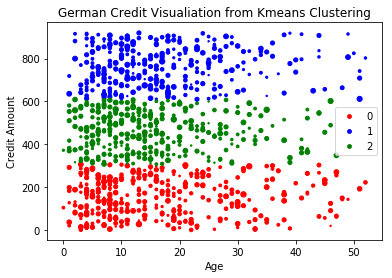

In [729]:
# Visualization the Result
x = X[:,0]
x1 = X[:,1]
group= kmeans.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit Amount")
plt.title("German Credit Visualiation from Kmeans Clustering")
plt.show()

From the scatter plot between the Age and Credit Amount, note that:
- Cluster 0 (Red) is a cluster that has a age characterstik from young to old but has the amount of credit amount around 0-300.
- Cluster 1 (Blue) is a cluster that has a age characterstik from young to old but has the amount of credit amount around 600-1000.
- Cluster 2 (Green) is a cluster that has a age characterstik from young to old but has an amount of credit amount around 300-600.

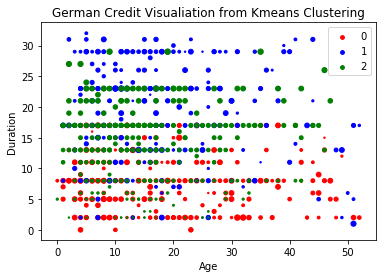

In [730]:
# Visualization the Result
x = X[:,0]
x1 = X[:,2]
group= kmeans.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Duration")
plt.title("German Credit Visualiation from Kmeans Clustering")
plt.show()

From the scatter plot between Duration and Age cannot be identified patterns from each cluster because there are several plots of each cluster that span other clusters and intermingled.

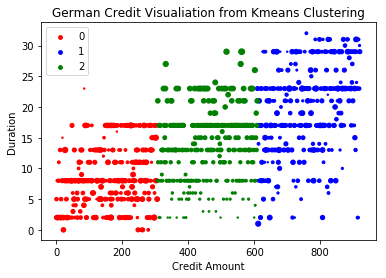

In [731]:
# Visualization the Result
x = X[:,1]
x1 = X[:,2]
group= kmeans.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Credit Amount")
ax.set_ylabel("Duration")
plt.title("German Credit Visualiation from Kmeans Clustering")
plt.show()

From the scatter plot between the Duration and Credit Amount, note that:
- Cluster 0 (Red) is a cluster that has a duration characterstik reach the payment time from short to long but has the amount of credit amount around 0-300.
- Cluster 1 (Blue) is a cluster that has a duration characterstik reach the payment time from short to long but has the amount of credit amount around 600-1000.
- Cluster 2 (Green) is a cluster that has a duration characterstik reach the payment time from short to long but has an amount of credit amount around 300-600.

In [732]:
grouped_kmean = data_clustered.groupby(['cluster']).mean().round(1)
grouped_kmean

,0,1,2
cluster,,,
0,17.1,156.6,8.7
1,16.8,763.2,19.6
2,15.5,456.7,13.5


From the results of the information mean each cluster then it looks that:
- Cluster 0 has the characteristics of an old average age, average low credit amount and short average duration
- Cluster 1 has the characteristics of medium average age, average credit amount and high average duration
- Cluster 2 has the characteristics of a young average age, average credit amount being and medium average duration

### Hierarchial Clustering

In [735]:
# Import libraries
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In the clustering hierarchy, we previously needed to determine the optimal K-value using the agglomerative plot.

**Get optimal K in hierarchial clustering using plot agglomerative**

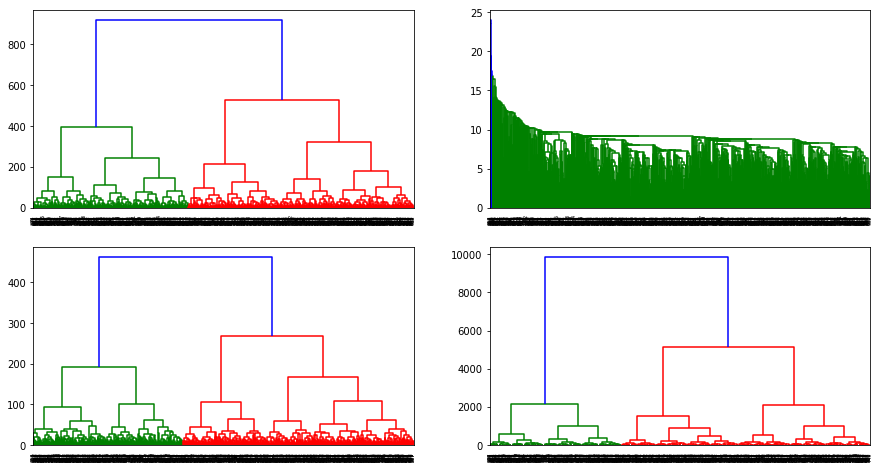

In [736]:
# Plotting agglomerative

f=plt.figure(figsize=(15,8))
f.add_subplot(2,2,1)
dendrogramcomplete = sch.dendrogram(sch.linkage(X, method='complete'))  #using complete linkage
f.add_subplot(2,2,2)
dendrogramsingle = sch.dendrogram(sch.linkage(X, method='single'))      #using single linkage
f.add_subplot(2,2,3)
dendrogramaverage = sch.dendrogram(sch.linkage(X, method='average'))    #using average linkage
f.add_subplot(2,2,4)
dendrogramward = sch.dendrogram(sch.linkage(X, method='ward'))          #using ward linkage

To get a value of k, in hierarchial clustering is used Dendogram to determine how many clusters will be formed. In this step, I choosing using method = 'ward' cause The Ward method is based on the criterion of Sum square error (SSE) with the size of homogenization between two objects based on the sum of the minimum error squared.

In [762]:
# fitting hierarchical clustering 
modelward = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
modelward.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x00000186464B3AE8>)

In [763]:
labelsward = modelward.labels_
labelsward

array([2, 1, 0, 3, 1, 3, 0, 3, 0, 1, 2, 1, 0, 2, 2, 2, 0, 3, 3, 1, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 3, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 3, 1,
       3, 2, 0, 2, 3, 0, 0, 1, 2, 1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 3, 0, 1,
       0, 2, 0, 0, 3, 2, 2, 1, 0, 0, 1, 1, 3, 1, 1, 2, 0, 0, 0, 2, 2, 3,
       0, 2, 2, 2, 2, 1, 2, 3, 0, 0, 0, 3, 2, 0, 2, 0, 0, 3, 3, 1, 3, 2,
       2, 2, 3, 3, 0, 1, 3, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 3, 3,
       0, 0, 3, 2, 3, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 3,
       3, 2, 2, 2, 1, 0, 0, 2, 2, 3, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 3, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 1, 2, 2, 3, 0, 2, 3, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 2, 0, 1, 0, 3, 3, 2, 0, 1, 0, 0, 2, 0, 0, 3, 0, 2, 0, 2, 0,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 3, 0, 0, 1, 2, 0, 0, 1, 0,
       2, 2, 3, 0, 3, 2, 0, 2, 3, 0, 3, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 3,
       1, 3, 2, 2, 2, 3, 3, 1, 3, 3, 1, 2, 0, 0, 2,

In [738]:
# Displaying clustering results data
dataclustered = pd.DataFrame(X)
dataclustered['cluster'] = pd.DataFrame(labelsward)
dataclustered.head()

,0,1,2,cluster
0,48,142,2,2
1,3,770,29,1
2,30,390,8,0
3,26,848,26,3
4,34,734,17,1


In [739]:
cluster_value=dataclustered['cluster'].value_counts()
cluster_value

0    346
2    308
1    204
3    142
Name: cluster, dtype: int64

From clustering results using K-means with k = 4 formed the cluster result as above. For cluster 0 amounted to 346 creditor, for cluster 1 amounted to 308 creditor, for cluster 2 amounted to 204 creditor, and cluster 3 amounted to 142 creditor.

Text(0.5,0,'Type of Cluster')

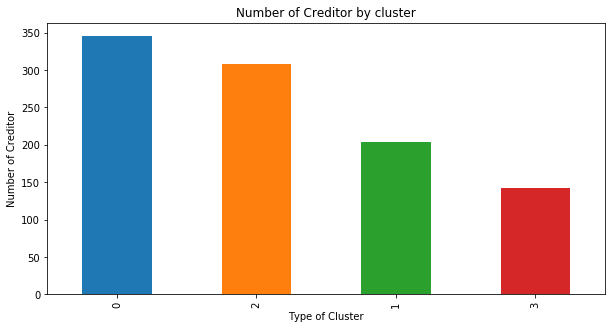

In [766]:
#Distribution of Class cluster

dataclustered['cluster'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Creditor by cluster")
plt.ylabel('Number of Creditor')
plt.xlabel('Type of Cluster')

From the results of the above barplot, it looks that the cluster that has the most amount of creditor is cluster 0 and the fewest creditor are clusters 3.

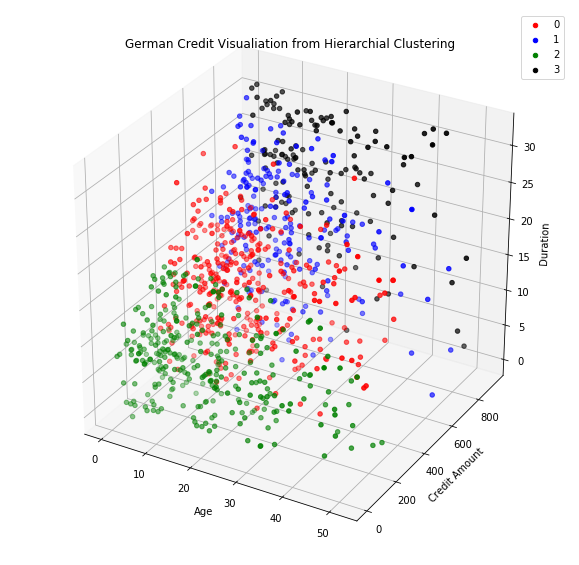

In [741]:
# Visualization the Result
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= modelward.labels_
color = ['red','blue','green', 'black']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(modelward.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit Amount")
ax.set_zlabel("Duration")
plt.title("German Credit Visualiation from Hierarchial Clustering")
plt.show()

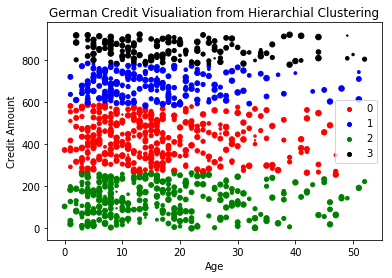

In [742]:
# Visualization the Result
x = X[:,0]
x1 = X[:,1]
group= modelward.labels_
color = ['red','blue','green', 'black']
fig, ax = plt.subplots()
for g in set(modelward.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit Amount")
plt.title("German Credit Visualiation from Hierarchial Clustering")
plt.show()

From the results of the scatter plot Age and Credit Amount it looks that:
- Cluster 0 (Red) has the Age characteristic of young to young, but it has a credit amount around 0-300.
- Cluster 1 (blue) has the Age characteristic of young to young, but it has the type of credit amount around 600-800.
- Cluster 2 (Green) has the Age characteristic of young to young, but it has the type of credit amount around 300-600.
- Cluster 3 (Black) has the Age characteristic of young to young, but it has the credit amount type around 800-1000. 

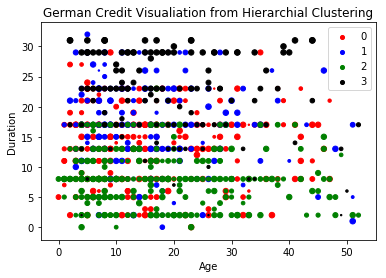

In [743]:
# Visualization the Result
x = X[:,0]
x1 = X[:,2]
group= modelward.labels_
color = ['red','blue','green', 'black']
fig, ax = plt.subplots()
for g in set(modelward.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Duration")
plt.title("German Credit Visualiation from Hierarchial Clustering")
plt.show()

From the scatter plot between Duration and Age cannot be identified patterns from each cluster because there are several plots of each cluster that span other clusters and intermingled.

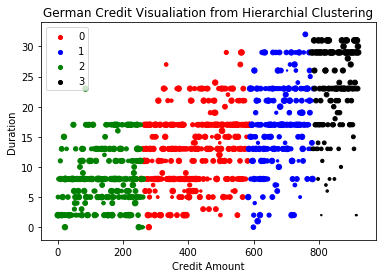

In [744]:
# Visualization the Result
x = X[:,1]
x1 = X[:,2]
group= modelward.labels_
color = ['red','blue','green', 'black']
fig, ax = plt.subplots()
for g in set(modelward.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Credit Amount")
ax.set_ylabel("Duration")
plt.title("German Credit Visualiation from Hierarchial Clustering")
plt.show()

From the results of the scatter plot Age and Credit Amount it looks that:
- Cluster 0 (Red) has the Duration characteristic from short to long, but it has a credit amount around 0-300.
- Cluster 1 (blue) has the Duration characteristic from short to long, but it has the type of credit amount around 600-800.
- Cluster 2 (Green) has the Duration characteristic from short to long, but it has the type of credit amount around 300-600.
- Cluster 3 (Black) has the Duration characteristic from short to long, but it has the credit amount type around 800-1000. 

In [745]:
grouped_mean = dataclustered.groupby(['cluster']).mean().round(1)
grouped_mean

,0,1,2
cluster,,,
0,16.1,422.0,13.0
1,15.4,682.5,17.0
2,16.7,136.4,8.4
3,18.8,849.8,22.2


From the results of the information mean each cluster then it looks that:
- Cluster 0 has the characteristics of a medium average age, average medium credit amount and medium average duration
- Cluster 1 has the characteristics of a medium average age, average medium high amount and medium long average duration
- Cluster 2 has the characteristics of a medium average age, average low credit amount being and short average duration
- Cluster 3 has the characteristics of a medium average age, average high credit amount being and long average duration

### 3. DBScan Clustering 

In [774]:
# Import Libraries
from sklearn.cluster import DBSCAN
from sklearn import datasets

For DBScan clustering, First we need to specify the epsilon and the minimum sample formed. The determination of the epsilon is determined by how the characteristics of the variable values and for the minimum sample are determined from the minimum sample of each cluster to be formed by dbscan, the minimum sample that is too small will make the number of clusters resulting in more and a large minimum sample value will make the cluster count too little.

In [804]:
# fitting DBScan clustering
# eps=15, cause any data that have not similar range values
# min_sample=15
dbscan = DBSCAN(eps=15, min_samples=15)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=15, n_jobs=1, p=None)

In [805]:
# Displaying clustering results data
dataclustering = pd.DataFrame(X)
dataclustering['cluster'] = pd.DataFrame(dbscan.labels_)
dataclustering

,0,1,2,cluster
0,48,142,2,-1
1,3,770,29,1
2,30,390,8,1
3,26,848,26,0
4,34,734,17,-1
5,16,869,23,0
6,34,533,17,-1
7,16,813,23,1
8,42,562,8,-1
9,9,747,21,1


In [806]:
# Get infromation of number mobile by cluster
dataclustering['cluster'].value_counts()

 1    808
-1    115
 0     77
Name: cluster, dtype: int64

From clustering results using DBScan formed the cluster result as above. For cluster 1 amounted to 808 creditor, for cluster -1 (**NOISE**) amounted to 115 creditor, and for cluster 0 amounted to 77 creditor.

Text(0.5,0,'Type of Cluster')

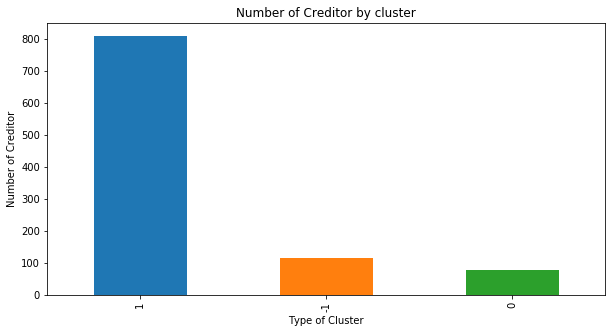

In [807]:
#Distribution of Class cluster

dataclustering['cluster'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Creditor by cluster")
plt.ylabel('Number of Creditor')
plt.xlabel('Type of Cluster')

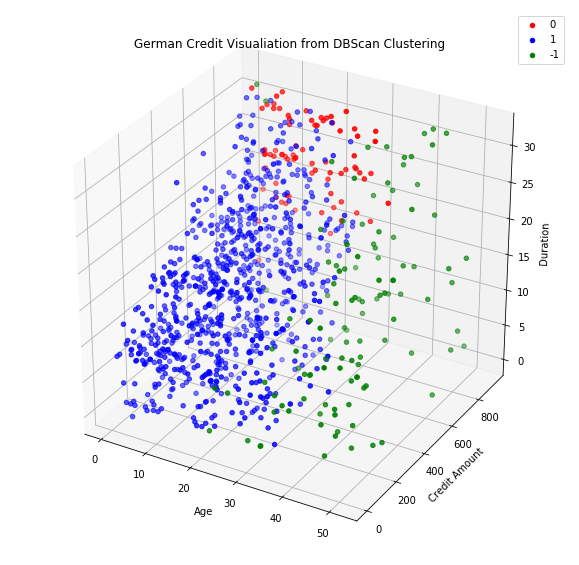

In [809]:
# Visualization the Result
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= dbscan.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit Amount")
ax.set_zlabel("Duration")
plt.title("German Credit Visualiation from DBScan Clustering")
plt.show()

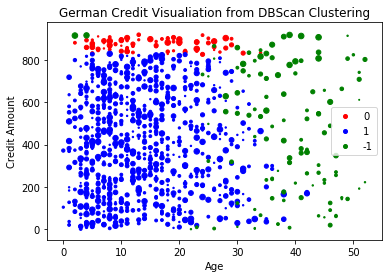

In [810]:
# Visualization the Result
x = X[:,0]
x1 = X[:,1]
group= dbscan.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit Amount")
plt.title("German Credit Visualiation from DBScan Clustering")
plt.show()

From the scatter plot between Age vs Credit Amount and the cluster result using the CBScan method above it appears that there is no definite pattern that distinguishes each cluster. It is only reflected that :
- cluster-1 (**NOISE**) is a cluster that has an age of about 30 years for the range of young to old, 
- while cluster 0 is the cluster that has the highest credit amount value of above 800, 
- and cluster 1 is a cluster that has a range around the age of 0 to 45 years and the credit amount in the range 0-800. 

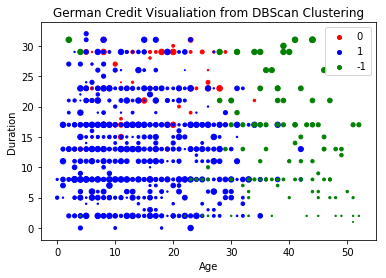

In [811]:
# Visualization the Result
x = X[:,0]
x1 = X[:,2]
group= dbscan.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Duration")
plt.title("German Credit Visualiation from DBScan Clustering")
plt.show()

From the scatter plot between Duration and Age cannot be identified patterns from each cluster because there are several plots of each cluster that span other clusters and intermingled.

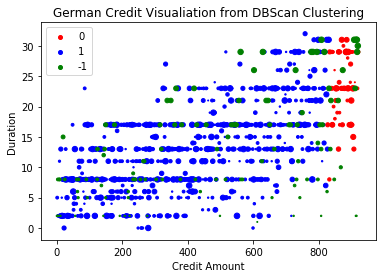

In [812]:
# Visualization the Result
x = X[:,1]
x1 = X[:,2]
group= dbscan.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Credit Amount")
ax.set_ylabel("Duration")
plt.title("German Credit Visualiation from DBScan Clustering")
plt.show()

From the scatter plot between Duration and Credit Amount cannot be identified patterns from each cluster because there are several plots of each cluster that span other clusters and intermingled.

In [817]:
grouped_mean = dataclustering.groupby(['cluster']).mean().round(1)
grouped_mean

,0,1,2
cluster,,,
-1,37.7,477.6,13.1
0,15.1,872.6,23.5
1,13.6,403.3,12.9


From the results of the information mean each cluster then it looks that:
- Cluster 0 has the characteristics of a medium average age, average high credit amount and medium long average duration
- Cluster 1 has the characteristics of a young average age, average low amount and long average duration
- Cluster -1 (**NOISE**) has the characteristics of a old average age, average medium credit amount being and short average duration

## Conclusion

After seeing the cluster results of each clustering algorithm used then I chose to use clustering using the **K-Means Clustering** method because :
- The result of Algortithma clustering is easier to interpret and easier Used although subjectivity exists but it is more minimal than the other 2 methods.
- Results 3D plots of each Algorithma, K-Means provides easy-to-understand visualizations compared to other methods.
- K-Means to clustering data based on clear boundaries, so it is easy to understand each of the cluster's characteristics.
- This method attempts to minimize the variation between existing data in a cluster and maximize the variation with the data present in the other cluster. 

From the results of the clustering K-means, the cluster formed is 3 clusters. Characteristic of each cluster has been described above that distinguishes each cluster is the **amount of credit** taken, while the age and duration factors have no significant effect on the difference in cluster results.
Then I can categorize these 3 clusters in 3 categorics namely low, medium, and high.
- Cluster 0 (Red) = **LOW** is  has the amount of credit low, The average age is old, and the duration is slightly.
- Cluster 1 (Blue) = **HIGH** is has the amount of credit  high, The average age is medium, and the duration is long.
- Cluster 2 (Green) = **MEDIUM** is has the amount of credit medium, The aveage age is young, and the duration is relative.

**Business client/department**

For business activities, this clustering can be used by marketing and management of banks/companies in caring for their credit customers.

**For Marketing**
- Corporate Marketing can do special treatment for creditor. In terms of upgrade can be done for low class: which is in category or class low so that can offer higher credit then creditor can stay credit and company benefit from the loan. To keep the stay and borrow more, the company can provide special treatment on the medium cluster so that creditor on the medium cluster can more creditor. And for the high cluster, the company must make treatment so that the creditor still do the loan in the company. 

**For Management Bank**
- Banks need to conduct surveillance on creditors who make loans. It can be seen if an creditor is doing credit with a lot of possibilities he will also take a long time in the repayment time of the credit amount. So, the bank needs to remind the customer via phone/emai/messaging before maturity and perform a futures memory so that no creditors fail.

In [831]:
# Result cluster using k-means algorithm
data_clustered.columns= ['Age', 'Amount Credit', 'Duration', 'cluster']
data_clustered['cluster'][data_clustered['cluster']==0]='low'
data_clustered['cluster'][data_clustered['cluster']==1]='high'
data_clustered['cluster'][data_clustered['cluster']==2]='medium'
data_clustered

C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Amount Credit,Duration,cluster
0,48,142,2,low
1,3,770,29,high
2,30,390,8,medium
3,26,848,26,high
4,34,734,17,high
5,16,869,23,high
6,34,533,17,medium
7,16,813,23,high
8,42,562,8,medium
9,9,747,21,high


Text(0.5,0,'Type of Cluster')

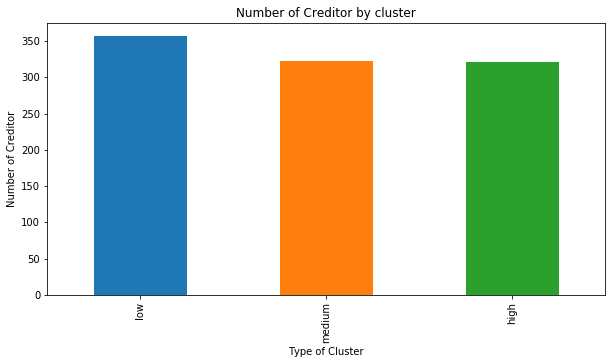

In [832]:
#Distribution of Class cluster

data_clustered['cluster'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Creditor by cluster")
plt.ylabel('Number of Creditor')
plt.xlabel('Type of Cluster')